In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch as torch
import torch.distributions as dist
import matplotlib.pyplot as plt

imbalances = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
f = imbalances[None, :, None]
f = np.concatenate([f, 1 - f], axis=-1)
scales = np.array([10, 100, 1000])
alphas = f * np.broadcast_to(scales[:, None, None], (len(scales), 1, 2))

count_eu = alphas.sum(-1)

dirichlet = dist.Dirichlet(torch.tensor(alphas))
entropy_eu = -dirichlet.entropy()

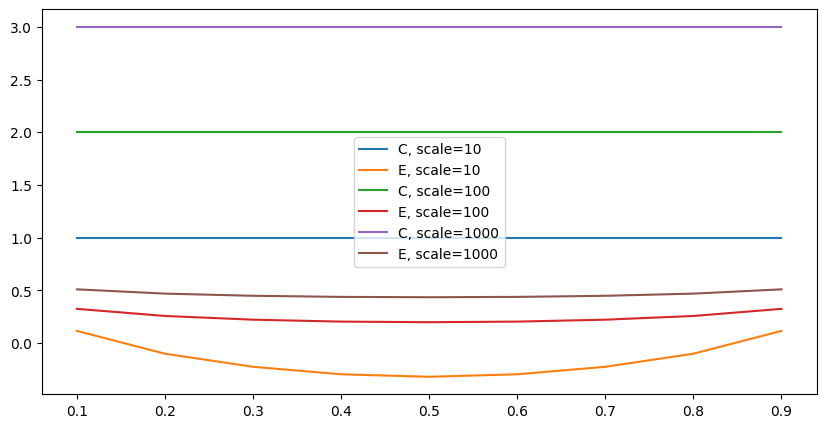

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for i in range(len(scales)):
    ax.plot(imbalances, np.log10(count_eu[i]), label=f'C, scale={scales[i]}')
    ax.plot(imbalances, np.log10(entropy_eu[i]), label=f'E, scale={scales[i]}')

ax.legend()

plt.show()